In [1]:
# environment set up
import keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf # only use tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# local
import spectra_ml     #make sure path is specified in computer
from spectra_ml import metrics

# working folder
directory = "C:/Users/Bonita/Documents/GitHub/spectra-ml/data"
os.chdir(directory)

# print(os.getcwd())

Using TensorFlow backend.


In [2]:
# dataset = str(directory + "/dataset3")
# num_samples = len([name for name in os.listdir(dataset) if \
#                    os.path.isfile(os.path.join(dataset,name))])

# print(num_samples)

In [3]:
stddata_path = directory+"/ASCIIdata_splib07a/ASCIIdata_splib07a.standardized"
metadata = pd.read_csv(stddata_path+"/spectra-metadata.csv", sep="|")
metadata.head()

,id,material,spectrometer_purity_code,measurement_type,raw_data_path
0,18244,Alizarin_crimson (dk) GDS780,ASDFRa,AREF,ChapterA_ArtificialMaterials\splib07a_Alizarin...
1,18253,Aluminum brushed 293K,ASDFRa,AREF,ChapterA_ArtificialMaterials\splib07a_Aluminum...
2,18262,Ammonium_Chloride GDS77,BECKa,AREF,ChapterA_ArtificialMaterials\splib07a_Ammonium...
3,18269,Asphalt GDS376 Blck_Road old,ASDFRa,AREF,ChapterA_ArtificialMaterials\splib07a_Asphalt_...
4,18278,Asphalt_Shingle GDS366 Tan,ASDFRa,AREF,ChapterA_ArtificialMaterials\splib07a_Asphalt_...


In [4]:
def find_record(string):
    ind = string.find("|")
    return string[:ind]

In [5]:
data = metadata.iloc[0]
type(data)

metadata[metadata["material"].str.match("Chlor")].shape[0]

34

In [6]:
record_nums = []
y = []
spectrum_names = []

irecord=0
imatname = 1

for i in range(metadata.shape[0]):
    data = metadata.iloc[i, :]
    #print(data[1])
    #print(type(data))
    if data[1].find("Actinolite") != -1: # if material name contains actinolite
        record_nums.append(data[0])
        y.append(int(0))
        spectrum_names.append("Actinolite")
    elif data[1].find("Alun") != -1:
        record_nums.append(data[0])
        y.append(int(1))
        spectrum_names.append("Alunite")
    elif (data[1].find("Chlor") != -1 \
          or data[1].find("Chlor+") != -1 \
          or data[1].find("Chl.") != -1):
        record_nums.append(data[0])
        y.append(int(2))
        spectrum_names.append("Chlorite")


y = np.reshape(y, (len(y), 1))
num_samples = len(record_nums)
print(num_samples)
print(len(y))
print(type(y))

print(record_nums)

147
147
<class 'numpy.ndarray'>
['18262', '19937', '20133', '108', '114', '124', '120', '130', '142', '148', '158', '154', '164', '177', '189', '195', '205', '201', '211', '229', '236', '240', '662', '670', '685', '672', '702', '719', '706', '736', '753', '740', '769', '785', '802', '821', '837', '843', '833', '855', '868', '874', '827', '883', '899', '915', '932', '944', '960', '976', '992', '996', '2577', '2591', '2587', '2597', '2614', '2620', '2626', '2632', '2645', '2651', '2660', '2662', '2680', '2697', '2684', '2710', '2714', '2718', '2731', '2735', '2748', '2750', '17199', '17186', '11621', '11628', '11636', '11647', '11643', '11656', '11661', '11696', '11678', '11686', '11709', '11705', '11719', '11725', '11745', '11741', '11751', '11768', '11785', '11811', '11801', '11825', '11821', '11831', '11669', '11886', '12118', '12127', '12133', '12139', '12145', '12155', '12166', '12164', '12182', '12192', '12202', '12212', '12218', '12761', '12759', '12935', 'bars', 'bars', 'bars', '

In [7]:
spectrum_len = 1000
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

# y = np.zeros((num_samples, 1))

In [8]:
# import shutil

# for num in actinolite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Actinolite")
# for num in alunite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Alunite")
# for num in chlorite:
#     shutil.copy2(stddata_path+"/{}.csv".format(num), directory+"/Std_Chlorite")

In [9]:
# debug cell 
# for cell below

#data = pd.read_csv(stddata_path+"/{}.csv".format(record_nums[i]))
#print(data)

In [10]:
num_neg = 0
for i in range(num_samples):
    hasnegative = False
    data = pd.read_csv(stddata_path+"/{}.csv".format(record_nums[i]))
    if i == 0:
        print(data.iloc[0,:])
        wavelengths[i,:] = data.iloc[:, 0].values
    spectra[i,:] = data.iloc[:, 1].values
    for j in range(spectrum_len):
        if spectra[i,j] < 0:
            hasnegative = True
            spectra[i,j] = 0
    if hasnegative:
        print(record_nums[i])
        num_neg += 1
# print(num_neg)
# wavelengths
# print(record_nums[43])
# print(spectra[43])

wavelength     0.370000
reflectance    0.760556
Name: 0, dtype: float64
164
201
211
240
662
685
672
719
706
753
740
769
785
802
855
883
899
915
944
960
976
996
2597
2632
2662
2697
2684
2714
2718
2735
2748
2750
11656
11725
11751
11768
11785
11831
12759
12935


In [11]:
# spectrum_len = 480
# spectra = np.zeros((num_samples,spectrum_len))

# spectrum_categories = np.zeros(num_samples)
# first_record_of_mixtures_chapter = 11602
# is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
# is_a_mixture = 2
# spectrum_names = ["" for x in range(num_samples)]

# y = np.zeros((num_samples, 1))

# os.chdir(dataset)

# i = 0

# for filename in os.listdir(dataset):
#     file_object  = open(filename, 'r').readlines()
# #     strip off header, add to matrix 'spectra'
#     spectra[i,:] = file_object[1:]

# #     label spectrum class, based on header
# #     actinolite: 0, alunite: 1, chlorite: 2
#     material_name = file_object[0]
    
#     spectrum_names[i] = material_name
    
#     start = 'Record='
#     end = ':'
#     record_number = int((material_name.split(start))[1].split(end)[0])
#     # print(record_number)
#     if record_number < first_record_of_mixtures_chapter:
#         spectrum_categories[i] = is_a_mineral
#     else:
#         spectrum_categories[i] = is_a_mixture

# #     print(material_name)

#     if material_name.find('Actinolite',) != -1: # if material name contains actinolite
#         y[i,0] = 0
#     elif material_name.find('Alun',)!= -1:
#         y[i,0] = 1
#     else: # chlorite
#         y[i,0] = 2

# #     turn missing points into 0
#     for j in range(spectrum_len):
#         if spectra[i,j] < 0:
#             spectra[i,j] = 0
#     i+=1

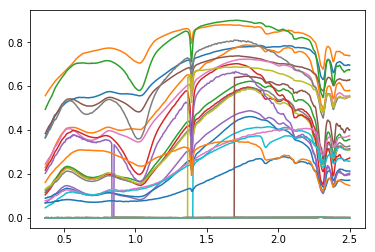

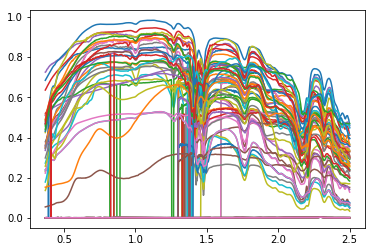

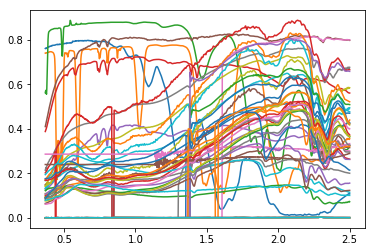

In [12]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
#     if spectrum_categories[i] == is_a_mineral:
#         linewidth = mineral_linewidth
        
#         #testcode
#         #print('min')
#     else: 
#         linewidth = mixture_linewidth
    linewidth = 2
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
#     fig = plt.figure()
#     plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
    plt.plot(wavelengths[0,:], spectra0[i,:]) # remove linewidth for all mixtures/minerals to be standard
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()
#     path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
#     fig.savefig(path, format = "PNG")
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i1):
#     plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
    plt.plot(wavelengths[0,:], spectra1[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
#     plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
    plt.plot(wavelengths[0,:], spectra2[i,:])
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [13]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
print(train_set_size)
print(test_set_size)
print(dev_set_size)
train_set_indices = sample_indices[:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(train_set_indices)
print(test_set_indices)
print(dev_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

147
87
31
29
[116, 93, 127, 137, 78, 16, 92, 76, 13, 29, 106, 126, 91, 119, 27, 48, 113, 125, 95, 104, 144, 58, 28, 35, 6, 131, 60, 73, 50, 128, 114, 67, 33, 118, 90, 54, 14, 75, 101, 71, 15, 98, 36, 121, 124, 142, 99, 69, 146, 43, 0, 102, 3, 105, 4, 65, 70, 22, 138, 38, 19, 112, 7, 61, 135, 21, 134, 9, 10, 64, 141, 133, 12, 81, 87, 56, 89, 97, 66, 62, 85, 52, 77, 20, 94, 49, 111]
[47, 80, 57, 25, 82, 31, 139, 72, 143, 11, 103, 24, 1, 30, 132, 5, 100, 17, 79, 145, 130, 45, 109, 88, 96, 18, 136, 32, 53, 120, 122]
[59, 107, 34, 51, 40, 63, 68, 37, 129, 140, 83, 23, 8, 86, 110, 44, 2, 46, 123, 41, 26, 42, 84, 117, 74, 55, 108, 115, 39]


In [14]:
train_labels = train_labels.flatten()
dev_labels = dev_labels.flatten()
test_labels = test_labels.flatten()
# type(train_labels)

In [15]:
# len(train_set)
# len(train_set[17])
print(test_set.shape)

(31, 1000)


In [16]:
train_set = np.reshape(train_set, (train_set.shape[0], spectrum_len, 1))
dev_set = np.reshape(dev_set, (dev_set.shape[0], spectrum_len, 1))
test_set = np.reshape(test_set, (test_set.shape[0], spectrum_len, 1))


print(train_labels)
train_labels = np.reshape(train_labels, (train_labels.shape[0], 1))
dev_labels = np.reshape(dev_labels, (dev_labels.shape[0], 1))
test_labels = np.reshape(test_labels, (test_labels.shape[0], 1))


train_labels = to_categorical(train_labels)
dev_labels = to_categorical(dev_labels)
test_labels = to_categorical(test_labels)

[1 1 1 1 0 0 1 0 0 1 2 1 1 0 1 1 2 0 1 2 2 2 1 1 0 1 2 2 1 1 2 2 1 0 1 2 0
 2 2 2 0 1 1 0 0 2 1 2 2 1 2 2 0 2 0 2 2 1 1 1 0 2 0 2 1 0 1 0 0 2 2 1 0 1
 1 2 1 1 2 2 1 2 0 0 1 1 2]


In [17]:
#print(train_labels)

In [18]:
print(train_set.shape[1])


model = Sequential()
# model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model.add(Conv1D(64, 25, activation='relu', input_shape=(train_set.shape[1], 1)))
model.add(Conv1D(64, 25, activation='relu'))
model.add(MaxPooling1D(4)) # 108 by 64 so far
model.add(Conv1D(100, 25, activation='relu'))
model.add(Conv1D(100, 25, activation='relu'))
model.add(MaxPooling1D(4))
# model.add(Dropout(0.5))
# model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

1000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 976, 64)           1664      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 952, 64)           102464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 238, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 214, 100)          160100    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 190, 100)          250100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 47, 100)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4700)              0         
_____

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 12
EPOCHS = 5

print(train_labels.shape)
#model.fit(train_set, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, \
            #verbose=1, validation_data=(dev_set, dev_labels))
History = model.fit(train_set, train_labels, batch_size=BATCH_SIZE, \
                    epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_labels)) 

(87, 3)
Train on 87 samples, validate on 29 samples
Epoch 1/5
87/87 [==============================] - 3s 29ms/step - loss: 1.1207 - acc: 0.3793 - val_loss: 1.0711 - val_acc: 0.5517
Epoch 2/5
87/87 [==============================] - 2s 22ms/step - loss: 1.1111 - acc: 0.4023 - val_loss: 0.9933 - val_acc: 0.6207
Epoch 3/5
87/87 [==============================] - 2s 22ms/step - loss: 1.0730 - acc: 0.4713 - val_loss: 1.0824 - val_acc: 0.4483
Epoch 4/5
87/87 [==============================] - 2s 23ms/step - loss: 1.0458 - acc: 0.5057 - val_loss: 0.7919 - val_acc: 0.7931
Epoch 5/5
87/87 [==============================] - 2s 23ms/step - loss: 0.9884 - acc: 0.5747 - val_loss: 0.8644 - val_acc: 0.7241


In [20]:
y_pred = model.predict(test_set)
#y_pred

In [21]:
#test_labels

In [22]:
model.evaluate(test_set, test_labels)

31/31 [==============================] - 0s 6ms/step


[0.9047675728797913, 0.6451612710952759]

In [23]:
# use bootstrap(model, data, data_labels, num_epochs, batch_size, num_bootstrap_runs)
num_epochs = EPOCHS
batch_size = BATCH_SIZE
num_bootstrap_runs = 3

##
train_set_labels = train_labels
dev_set_labels = dev_labels
#History = model.fit(train_set, train_set_labels, batch_size=BATCH_SIZE,\
         #epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_set_labels))
##

bresults = spectra_ml.metrics.bootstrap(model, spectra, y, num_epochs, batch_size, num_bootstrap_runs)
print(bresults)

Train on 89 samples, validate on 29 samples
Epoch 1/5
89/89 [==============================] - 2s 23ms/step - loss: 0.9373 - acc: 0.5843 - val_loss: 0.8454 - val_acc: 0.5862
Epoch 2/5
89/89 [==============================] - 2s 23ms/step - loss: 0.7684 - acc: 0.6292 - val_loss: 2.4005 - val_acc: 0.5862
Epoch 3/5
89/89 [==============================] - 2s 23ms/step - loss: 1.1306 - acc: 0.5955 - val_loss: 0.8610 - val_acc: 0.6207
Epoch 4/5
89/89 [==============================] - 2s 24ms/step - loss: 0.9228 - acc: 0.5393 - val_loss: 0.7833 - val_acc: 0.6552
Epoch 5/5
29/29 [==============================] - 0s 6ms/step
[[0.58426966 0.         0.        ]
 [0.62068963 0.         0.        ]]
